<a href="https://colab.research.google.com/github/ayushs0911/Object-Detection/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d mistag/arthropod-taxonomy-orders-object-detection-testset

 75% 25.0M/33.5M [00:00<00:00, 45.4MB/s]
100% 33.5M/33.5M [00:00<00:00, 51.9MB/s]


In [2]:
!unzip arthropod-taxonomy-orders-object-detection-testset

Archive:  arthropod-taxonomy-orders-object-detection-testset.zip
  inflating: ArTaxOr_TestSet/license.txt  
  inflating: ArTaxOr_TestSet/negatives/4e8a3e2629e2.jpg  
  inflating: ArTaxOr_TestSet/negatives/56d121e7ab91.jpg  
  inflating: ArTaxOr_TestSet/negatives/a3c245ccd3a2.jpg  
  inflating: ArTaxOr_TestSet/negatives/abc25d55d24b.jpg  
  inflating: ArTaxOr_TestSet/negatives/ede91929e20c.jpg  
  inflating: ArTaxOr_TestSet/negatives/f37b8413c525.jpg  
  inflating: ArTaxOr_TestSet/positives/1d9c19837543.jpg  
  inflating: ArTaxOr_TestSet/positives/2f863e23deac.jpg  
  inflating: ArTaxOr_TestSet/positives/310304cfbc6e.jpg  
  inflating: ArTaxOr_TestSet/positives/4639e5dfdbcb.jpg  
  inflating: ArTaxOr_TestSet/positives/506dac891844.jpg  
  inflating: ArTaxOr_TestSet/positives/58e9db06f160.jpg  
  inflating: ArTaxOr_TestSet/positives/5c561eb545ef.jpg  
  inflating: ArTaxOr_TestSet/positives/78f770a91e9d.jpg  
  inflating: ArTaxOr_TestSet/positives/7e9efdf97033.jpg  
  inflating: ArTaxOr_T

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
! pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 18.9 MB/s eta 0:00:00


In [5]:
import ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [6]:
from ultralytics import YOLO

In [7]:
# Load a model
model = YOLO("/content/drive/MyDrive/Saved models/best.pt") 
batch_size = 32
imgsz = 640

In [11]:
import cv2
from matplotlib import pyplot as plt 


In [14]:
from PIL import Image

In [54]:
# Image.open("/content/ArTaxOr_TestSet/positives/1d9c19837543.jpg")

In [18]:
results =model.predict(Image.open("/content/ArTaxOr_TestSet/positives/1d9c19837543.jpg"))


0: 480x640 1 Diptera, 144.8ms
Speed: 3.3ms preprocess, 144.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [53]:
res_plotted = results[0].plot()

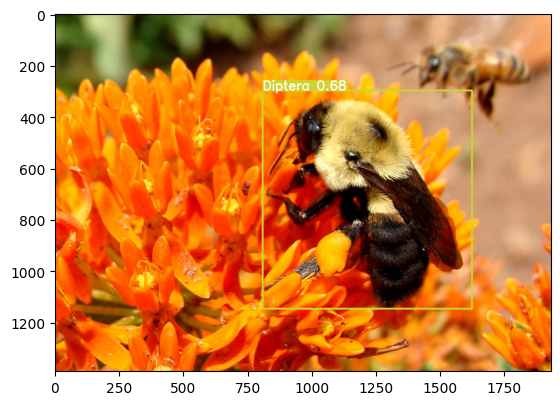

In [52]:
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [58]:
from glob import glob
from os import path
import os

In [56]:
test_set = "/content/ArTaxOr_TestSet/positives"

test_images = [Image.open(jpg) for jpg in glob(path.join(test_set, '*.jpg'))]

In [76]:
for img in test_images:
  results = model.predict(img, save = True)


0: 640x640 (no detections), 206.2ms
Speed: 5.2ms preprocess, 206.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 448x640 1 Hemiptera, 1 Diptera, 130.2ms
Speed: 2.7ms preprocess, 130.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 448x640 1 Araneae, 143.5ms
Speed: 2.9ms preprocess, 143.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 640x512 1 Diptera, 1 Odonata, 160.2ms
Speed: 3.8ms preprocess, 160.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 640x448 1 Lepidoptera, 133.1ms
Speed: 3.1ms preprocess, 133.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 480x640 1 Diptera, 1 Odonata, 148.1ms
Speed: 3.2ms preprocess, 148.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 6

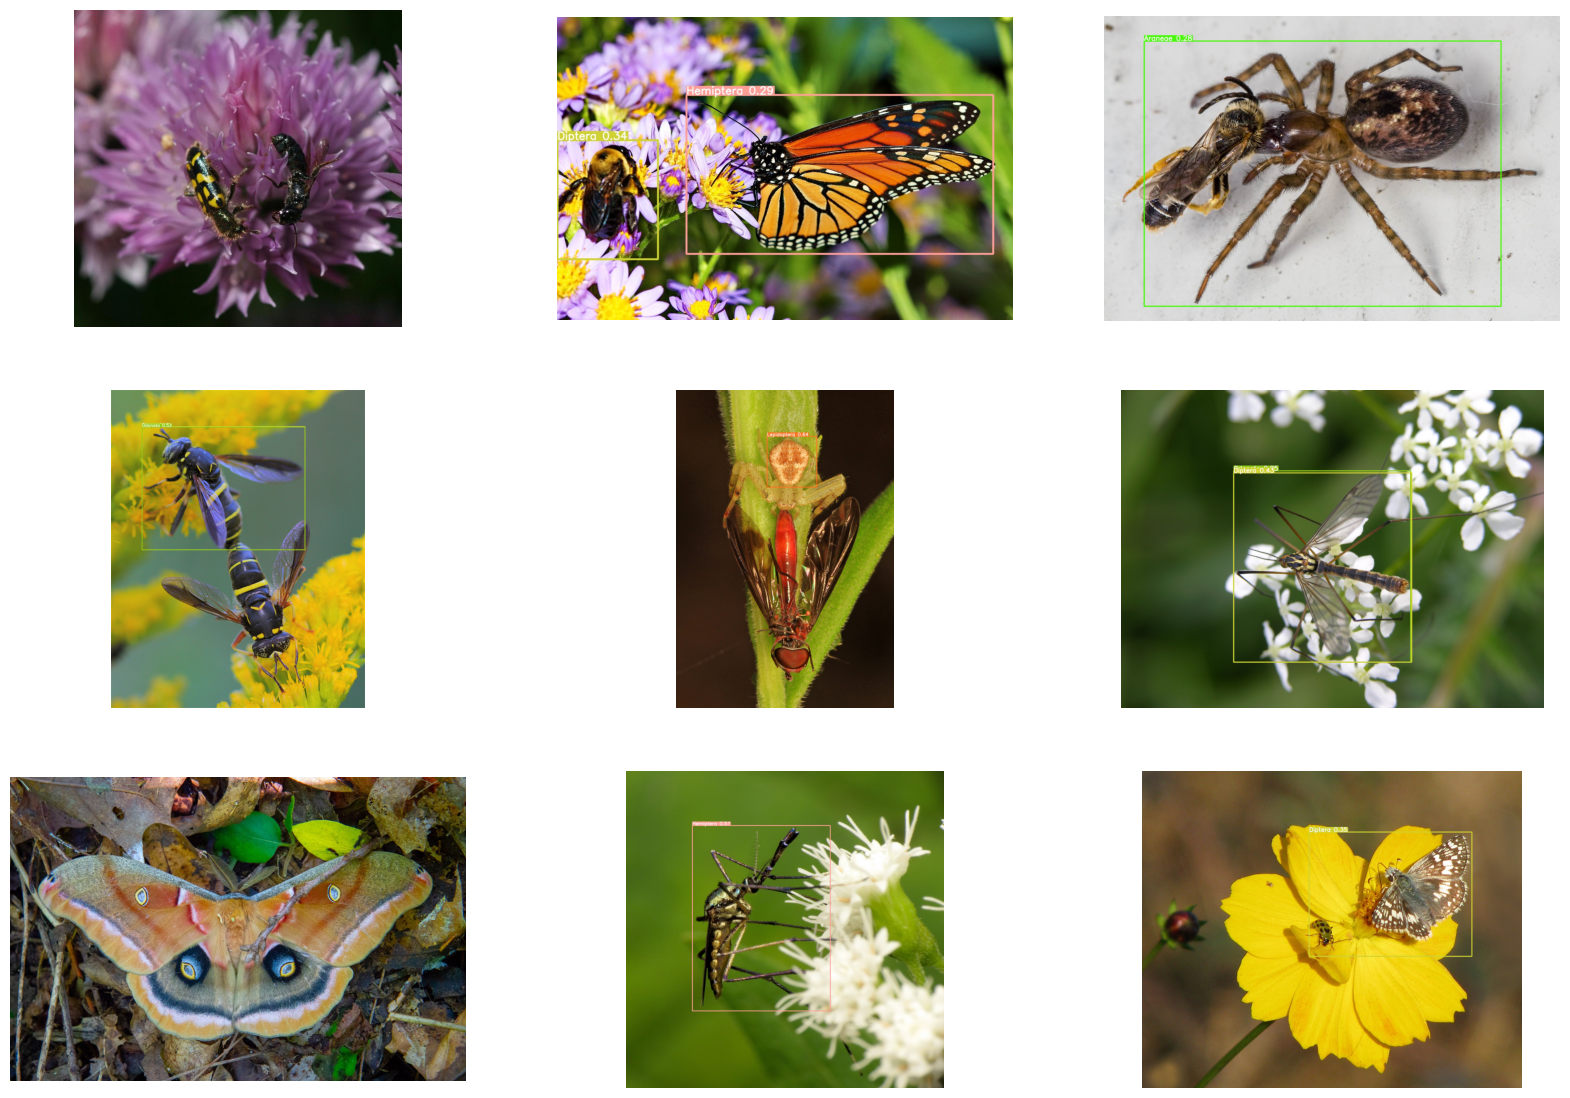

In [78]:
output = "/content/runs/detect/predict"
plt.figure(figsize = (20,14))
for i, filename in enumerate(os.listdir(output)):
  img = cv2.imread(os.path.join(output, filename))
  ax = plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  if i == 8:
    break